# ООП в Python. Часть 2


## Основные концепции ООП

Объектно-ориентированное программирование (ООП) является методологией разработки программного обеспечения, в основе которой лежит понятие класса и объекта, при этом сама программа создается как некоторая совокупность объектов, которые взаимодействую друг с другом и с внешним миром. Каждый объект является экземпляром некоторого класса. Классы образуют иерархии. Классы, как и функции, создаются и используются для удобства и упрощения разработки программ. Более подробно о понятии ООП можно прочитать на [википедии](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BD%D0%BE-%D0%BE%D1%80%D0%B8%D0%B5%D0%BD%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5).

Выделяют три (иногда четыре, добавляя *абстракцию*) основных “столпа” ООП - это *инкапсуляция*, *наследование* и полиморфизм.

### Инкапсуляция

Под инкапсуляцией понимается сокрытие деталей реализации, данных и т.п. от внешней стороны. Например, можно определить класс `холодильник`, который будет содержать следующие данные: `производитель`, `объем`, `количество камер хранения`, `потребляемая мощность` и т.п., и методы: `открыть/закрыть холодильник`, `включить/выключить`, но при этом реализация того, как происходит непосредственно включение и выключение пользователю вашего класса не доступна, что позволяет ее менять без опасения, что это может отразиться на использующей класс «холодильник» программе. При этом класс становится новым типом данных в рамках разрабатываемой программы. Можно создавать переменные этого нового типа, такие переменные называются объекты.

### Наследование

Под наследованием понимается возможность создания нового класса на базе существующего. При этом класс потомок будет содержать те же атрибуты и методы, что и базовый класс, но при этом его можно (и нужно) расширять через добавление новых методов и атрибутов.

Примером базового класса, демонстрирующего наследование, можно определить класс `автомобиль`, имеющий атрибуты: масса, мощность двигателя, объем топливного бака и методы: завести и заглушить. У такого класса может быть потомок – `грузовой автомобиль`, он будет содержать те же атрибуты и методы, что и класс `автомобиль`, и дополнительные свойства: количество осей, мощность компрессора и т.п..

### Полиморфизм

Полиморфизм позволяет одинаково обращаться с объектами, имеющими однотипный интерфейс, независимо от внутренней реализации объекта. Например, с объектом класса `грузовой автомобиль` можно производить те же операции, что и с объектом класса `автомобиль`, т.к. первый является наследником второго, при этом обратное утверждение неверно (во всяком случае не всегда). Другими словами полиморфизм предполагает разную реализацию методов с одинаковыми именами. Это очень полезно при наследовании, когда в классе наследнике можно переопределить методы класса родителя.

Простым примером полиморфизма может служить функция `count()`, выполняющая одинаковое действие для различных типов обьектов: `'abc'.count('a')` и `[1, 2, 'a'].count('a')`.  
Оператор плюс полиморфичен при сложении чисел и при сложении строк.

## Дескрипторы

Дескрипторы позволяют обобщить это поведение. Допустим, у нас сразу 2 элемента, на которые мы хотим навесить ограничение, чтобы они не были, допустим, отрицательными. Можно прописать свойства для каждого, а можно сделать лучше!

In [ ]:
class Order:
    def __init__(self, name, price, quantity):
        self.name = name
        self.price = price
        self.quantity = quantity

    def total(self):
        return self.price * self.quantity

In [1]:
class NonNegative:
    def __init__(self, name):
        self.name = name

    def __get__(self, instance, owner):
        return instance.__dict__[self.name]

    def __set__(self, instance, value):
        if value < 0:
            raise ValueError("Cannot be negative.")
        instance.__dict__[self.name] = value

In [2]:
class Order:
    price = NonNegative("price")
    quantity = NonNegative("quantity")

    def __init__(self, name, price, quantity):
        self._name = name
        self.price = price
        self.quantity = quantity

    def total(self):
        return self.price * self.quantity

In [5]:
order = Order("apple", 10, 5)
print(order.total())
order.quantity = 10

50


А теперь уберём ещё немного дублирования! (3.6+)

In [6]:
class NonNegative:
    def __get__(self, instance, owner):
        return instance.__dict__[self.name]

    def __set__(self, instance, value):
        if value < 0:
            raise ValueError("Cannot be negative.")
        instance.__dict__[self.name] = value

    def __set_name__(self, owner, name):
        self.name = name

In [7]:
class Order:
    price = NonNegative()
    quantity = NonNegative()

    def __init__(self, name, price, quantity):
        self._name = name
        self.price = price
        self.quantity = quantity

    def total(self):
        return self.price * self.quantity

In [8]:
apple_order = Order("apple", 1, 10)
print(apple_order.total())
apple_order.__dict__

10


{'_name': 'apple', 'price': 1, 'quantity': 10}

## Методы бывают разные

### `@staticmethod`

Иногда метод объекта никак не использует его атрибуты (не обращается к self), а просто выполняет независимую логику. В таком случае такой метод называется статическим. Мы можем использовать на нём специальный декоратор `@staticmethod`, и тогда мы помимо прочего сможем вызывать его, даже не создавая объект

Попробуем это на примере нашего термометра. Предположим, мы хотим научить его вычислять выдавать температуру в градусах по Фаренгейту. В таком случае нам следует определить метод `get_fahrenheit` и хорошо бы вынести сам перевод в отдельный метод `celsius_to_fahrenheit`:

In [9]:
class Thermometer:
    """
    Thermometer containing temperature in Celsius
    :param temperature: temperature to contain
    """

    MINIMAL_TEMPERATURE = -273.15

    def __init__(self, temperature: float) -> None:
        self.temperature = temperature

    @property
    def temperature(self) -> float:
        return self._temperature

    @temperature.setter
    def temperature(self, value: float) -> None:
        if value < Thermometer.MINIMAL_TEMPERATURE:
            raise ValueError(
                f"Temperature cannot be less than {Thermometer.MINIMAL_TEMPERATURE}"
            )
        self._temperature = value

    def celsius_to_fahrenheit(self, value) -> float:
        return value * 1.8 + 32

    def get_fahrenheit(self) -> float:
        return self.celsius_to_fahrenheit(self.temperature)


In [ ]:
def celsius_to_fahrenheit(value: float) -> float:
        return value * 1.8 + 32

In [10]:
thermometer = Thermometer(10.0)
print(
    f"{thermometer.temperature} градусов по Цельсию равны {thermometer.get_fahrenheit()} градусов по Фаренгейту"
)

10.0 градусов по Цельсию равны 50.0 градусов по Фаренгейту


Наша функция `celsius_to_fahrenheit` просто переводит температуру, которую получает на вход. Она никак не использует `self`. Давайте сделаем её статическим методом.

In [11]:
class Thermometer:
    """
    Thermometer containing temperature in Celsius
    :param temperature: temperature to contain
    """

    MINIMAL_TEMPERATURE = -273.15

    def __init__(self, temperature: float) -> None:
        self.temperature = temperature

    @property
    def temperature(self) -> float:
        return self._temperature

    @temperature.setter
    def temperature(self, value: float) -> None:
        if value < Thermometer.MINIMAL_TEMPERATURE:
            raise ValueError(
                f"Temperature cannot be less than {Thermometer.MINIMAL_TEMPERATURE}"
            )
        self._temperature = value

    @staticmethod
    def celsius_to_fahrenheit(value) -> float:
        return value * 1.8 + 32

    def get_fahrenheit(self) -> float:
        return self.celsius_to_fahrenheit(self.temperature)

In [15]:
# Thermometer.celsius_to_fahrenheit(10)
thermometer = Thermometer(10)
thermometer.celsius_to_fahrenheit(10.0)

50.0

Обратите внимание, что мы всё так же можем вызывать функцию от объекта класса (как, например, от `self` в `get_fahrenheit`). Но так же теперь мы можем вызывать её и от самого класса:

In [13]:
Thermometer.celsius_to_fahrenheit(10.0)

50.0

### `@classmethod`

Бывает и другая ситуация. Когда метод не использует атрибуты объекта (не обращается к `self`), но использует знание о том, из какого класса он вызывается. Такой метод называется методом класса и мы можем обозначить его декоратором `@classmethod`. Метод с декоратором `@classmethod` принимает в качестве первого аргумента не объект класса (`self`), а сам класс (`cls`).

Предположим, мы хотим уметь создавать наш термометр сразу из температуры по Фаренгейту. Но наш `__init__` принимает температуру в градусах Цельсия. Создадим новый метод класса `from_fahrenheit`, который будет переводить полученную температуру из Фаренгейта в Цельсии (при помощи нового статического метода `fahrenheit_to_celsius` и возвращать новый объект класса:

In [16]:
class Thermometer:
    """
    Thermometer containing temperature in Celsius
    :param temperature: temperature to contain
    """

    MINIMAL_TEMPERATURE = -273.15

    def __init__(self, temperature: float) -> None:
        self.temperature = temperature

    @property
    def temperature(self) -> float:
        return self._temperature

    @temperature.setter
    def temperature(self, value: float) -> None:
        if value < Thermometer.MINIMAL_TEMPERATURE:
            raise ValueError(
                f"Temperature cannot be less than {Thermometer.MINIMAL_TEMPERATURE}"
            )
        self._temperature = value

    @staticmethod
    def celsius_to_fahrenheit(value) -> float:
        return value * 1.8 + 32

    @staticmethod
    def fahrenheit_to_celsius(value) -> float:
        return (value - 32) / 1.8

    def get_fahrenheit(self) -> float:
        print(type(self))
        return self.celsius_to_fahrenheit(self.temperature)

    @classmethod
    def from_fahrenheit(cls, temperature_fahrenheit) -> Thermometer:
        temperature_celsius = cls.fahrenheit_to_celsius(temperature_fahrenheit)
        print(type(cls))
        return cls(temperature_celsius)

Теперь мы можем создать термометер из градусов по Фаренгейту:

In [17]:
thermometer_1 = Thermometer(10)
thermometer_2 = thermometer_1.from_fahrenheit(100)

<class 'type'>


## Наследование, `super()`

Одним из главных механизмов ООП является наследование. Класс может отнаследоваться от другого класса, тем самым получая доступ к его методам и атрибутам. Класс-ребёнок может добавлять свои новые методы и переопределять методы класса-родителя, но так же может использовать и все методы, определённые в классе родителе. Родительский класс в питоне указывается в скобках после названия класса во время объявления: `class Children(Parent)`. Причём один класс может быть ребёнком сразу нескольких классов. В таком случае они перечисляются через запятую.

Попробуем создать общий класс `Person`, который будет иметь атрибут `name` и сможет представляться при помощи метода `introduce`:

In [25]:
class Person:
    """
    A class representing a person with a name that can introduce himself
    :param name: the name of the person
    """

    def __init__(self, name: str) -> None:
        self.name = name

    def introduce(self) -> None:
        print(f"Hello, my name is {self.name}")

    def __str__(self) -> str:
        return f"A person named {self.name}"


In [26]:
person = Person("Dima")
person.introduce()
print(person)

Hello, my name is Dima
A person named Dima


Теперь создадим подклассы Teacher и Student. Помимо имени у преподавателя будет поле `discipline`, а у студента поле `marks`:

In [27]:
from typing import Dict


class Teacher(Person):
    """
    A class representing a teacher with his discipline
    :param name: the name of the teacher
    :param discipline: the discipline taught by the teacher
    """

    def __init__(self, name: str, discipline: str) -> None:
        super().__init__(name)  # Вызываем __init__ класса-родителя
        self.discipline = discipline

    def __str__(self) -> str:
        return f"A teacher named {self.name} who teaches {self.discipline}"


class Student(Person):
    """
    A class representing a student and his marks
    :param name: the name of the student
    :param marks: a dict of disciplines as keys and marks as values
    """

    def __init__(self, name: str, marks: Dict[str, int]) -> None:
        super().__init__(name)  # Вызываем __init__ класса-родителя
        self.marks = marks

    def __str__(self) -> str:
        return f"A student named {self.name} with marks {self.marks}"

In [28]:
teacher = Teacher("Evgeny", "Machine Learning")
teacher.introduce()
print(teacher)
print()

student = Student("Liza", {"Calculus": 5, "Machine Learning": 10})
student.introduce()
print(student)

Hello, my name is Evgeny
A teacher named Evgeny who teaches Machine Learning

Hello, my name is Liza
A student named Liza with marks {'Calculus': 5, 'Machine Learning': 10}


In [29]:
persons = []
persons.append(person)
persons.append(teacher)
persons.append(student)

for i in persons:
    i.introduce()

Hello, my name is Dima
Hello, my name is Evgeny
Hello, my name is Liza


Теперь любой код, который использует метод `introduce` может работать как с классом `Person`, так и с классами `Teacher` и `Student`.

И в то же время, ни в одном из этих классов мы не прописывали функцию `introduce`, потому что она уже есть в родительском классе `Person`, так что мы избежали дублирования кода и объединили объекты со схожей логикой между собой.

Стоит обратить особое внимание на оператор `super()`. Все методы, вызывающиеся от `super()`, будут вызваны от родительского класса (классов) объекта. Таким образом, когда мы вызываем `super().__init__(name)` в классах `Teacher` и `Student` мы выполняем код из метода `__init__` родительского класса `Person`: `self.name = name`, то есть определяем в объекте атрибут `name`. А затем уже мы добавляем новые атрибуты. Если функция `__init__` в родительском классе как-то поменяется, у нас ничего не сломается, и эти изменения будут использоваться и в дочерних классах.

Так же следует обратить внимание на то, что метод `__str__` определён как в родительсом классе `Person`, так и в дочерних `Teacher` и `Student`. Таким образом, дочерние классы переопределяют этот метод, и при вызове `print` или `str` от объектов дочерних классов будет вызыван их метод `__str__`, а не родительский.

Мы могли бы использовать `super()` и не только в `__init__`, например, чтобы расширить функционал представления:

In [30]:
class Teacher(Person):
    """
    A class representing a teacher with his discipline
    :param name: the name of the teacher
    :param discipline: the discipline taught by the teacher
    """

    def __init__(self, name: str, discipline: str) -> None:
        super().__init__(name)  # Вызываем __init__ класса-родителя
        self.discipline = discipline

    def introduce(self) -> None:
        super().introduce()
        print(f"I teach {self.discipline}")

    def __str__(self) -> str:
        return f"A teacher named {self.name} who teaches {self.discipline}"


teacher = Teacher("Evgeny", "Machine Learning")
teacher.introduce()

Hello, my name is Evgeny
I teach Machine Learning


Кроме того мы могли бы определить в дочерних классах совершенно новые методы, которых нет в классе-родителе:

In [31]:
class Student(Person):
    """
    A class representing a student and his marks
    :param name: the name of the student
    :param marks: a dict of disciplines as keys and marks as values
    """

    def __init__(self, name: str, marks) -> None:
        super().__init__(name)  # Вызываем __init__ класса-родителя
        self.marks = marks

    def __str__(self) -> str:
        return f"A student named {self.name} with marks {self.marks}"

    def get_fails(self):
        """
        Gets failed disciplines
        """
        return {discipline: mark for discipline, mark in self.marks.items() if mark < 4}


student = Student("Liza", {"Calculus": 3, "Machine Learning": 10})
student.introduce()
print(f"Failed disciplines: {student.get_fails()}")

Hello, my name is Liza
Failed disciplines: {'Calculus': 3}


Мы разобрали очень простой пример наследования. На практике деревья наследования могут быть очень большими, один класс может иметь множество детей и множество родителей. В таких случаях может стать непонятно, в каком именно порядке питон обходит родителей класса, чтобы понять, чью реализацию того или иного метода использовать.

Чтобы посмотреть этот порядок можно использовать атрибут **класса** `__mro__` (Method Resolution Order):

In [32]:
Student.__mro__

(__main__.Student, __main__.Person, object)

Мы видим, что если мы попытаемся вызвать у объекта класса `Student`, например, метод `introduce`, то сначала питон попытается найти его реализацию в самом классе `Student`. Если там её не окажется, он попробует класс `Person`, а если и там нет, то родительский класс всех классов `object`. (А если и там нет, то выдаст `AttributeError`)

Подробнее про то, как именно питон определяет этот порядок, можно почитать, например, [тут](https://habr.com/ru/post/62203/).

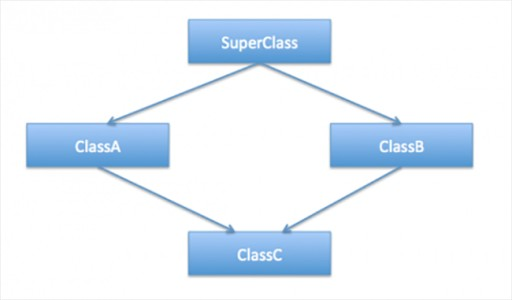

## ABC &mdash; Abstract Base Classes

Бывает так, что мы хотим обозначить какой-то список методов, которые должны реализовывать все классы одного семейства, но не можем предоставить дефолтной реализации для этих методов. Например, нам нужно написать код, который вычислял бы сумму площадей или периметров списка фигур, но для каждого типа фигуры эти величины вычисляются по-своему, а всё же хотелось бы как-то объединить их всех в один родительский класс и показать, какими методами должна обладать фигура.

В таком случае нам на помощь приходит модуль `abc` и декоратор `@abstractmethod`. Если мы отнаследуем наш класс от класса `abc.ABC` и добавим к методам декоратор `@abc.abstractmethod`, все классы, наследующиеся от нашего будут обязаны объявить эти методы, а иначе питон выдаст ошибку.

Давайте поробуем:

In [33]:
import abc


class Shape(abc.ABC):
    """
    Shape class capable of calculating its area and perimeter
    """

    @abc.abstractmethod
    def get_area(self) -> float:
        """
        Method for getting the area of the shape
        """
        pass

    @abc.abstractmethod
    def get_perimeter(self) -> float:
        """
        Method for getting the perimeter of the shape
        """
        pass

In [ ]:
...

Ellipsis

Попробуем создать класс, который наследуется от `Shape`, но не реализует эти методы:

In [34]:
class BadShape(Shape):
    pass

In [35]:
bad_shape = BadShape()

TypeError: Can't instantiate abstract class BadShape with abstract methods get_area, get_perimeter

Как видим питон не дал нам создать объект такого класса (но сам класс создать дал!)

Так же мы не сможем создать объект самого абстрактного класса `Shape`:

In [37]:
shape = Shape()

TypeError: Can't instantiate abstract class Shape with abstract methods get_area, get_perimeter

Теперь реализуем нормальные фигуры:

In [38]:
import math


class Circle(Shape):
    """
    A circle with a some radius
    """

    def __init__(self, radius: float) -> None:
        self.radius = radius

    def get_area(self) -> float:
        return math.pi * self.radius**2

    def get_perimeter(self) -> float:
        return 2 * math.pi * self.radius


class Rectangle(Shape):
    """
    A rectangle with some width and height
    """

    def __init__(self, width: float, height: float) -> None:
        self.width = width
        self.height = height

    def get_area(self) -> float:
        return self.width * self.height

    def get_perimeter(self) -> float:
        return 2 * (self.width + self.height)

Теперь мы можем написать функции, которая будет работать с нашими объектами `Shape`, и они могут быть уверены, что все классы, наследующиеся от `Shape` будут реализовывать нужные им методы:

In [39]:
def get_areas_sum(shapes):
    # Проверяем, что все наши объекты наследуются от Shape:
    for shape in shapes:
        if not isinstance(shape, Shape):
            raise ValueError(
                f"Only Shape objects are allowed, you tried to pass object of type {type(shape)}"
            )
    # if not all(isinstance(shape, Shape) for shape in shapes):
    #   raise ValueError("Only Shape objects are allowed")
    return sum(shape.get_area() for shape in shapes)


def get_perimeters_sum(shapes):
    # Проверяем, что все наши объекты наследуются от Shape:
    if not all(isinstance(shape, Shape) for shape in shapes):
        raise ValueError("Only Shape objects are allowed")
    return sum(shape.get_perimeter() for shape in shapes)

Попробуем использовать наши функции по назначению:

In [40]:
my_circle = Circle(10)
del my_circle.radius

In [41]:
print(get_areas_sum([Circle(1.0), Rectangle(1.0, 1.0)]))
print(get_areas_sum([Circle(1.0), Circle(2.0), Rectangle(3.0, 2.0)]))

print(get_perimeters_sum([Circle(1.0), Rectangle(1.0, 1.0)]))
print(get_perimeters_sum([Circle(1.0), Circle(2.0), Rectangle(3.0, 2.0)]))

4.141592653589793
21.707963267948966
10.283185307179586
28.84955592153876


Попробуем подать неправильные объекты:

In [42]:
print(get_areas_sum([Circle(1.0), Rectangle(1.0, 1.0), "STRING"]))

ValueError: Only Shape objects are allowed, you tried to pass object of type <class 'str'>

Питон так же имеет множество встроенных абстрактных классов, которые вы можете использовать, для проверки того, что объект удовлетворяет определённому интерфейсу: https://docs.python.org/3/library/collections.abc.html

In [43]:
from collections.abc import *


class MyStorage(Sequence):
    def __getitem__(self):
        pass

    def __len__(self):
        pass


storage = MyStorage()

### [Dataclasses](https://docs.python.org/3/library/dataclasses.html)

Зачастую нам нужен небольшой класс, который не имеет своих методов, но просто хранит в себе какие-то данные. Например, класс человека с именем, фамилией и возрастом.

Если мы напишем для такой цели полноценный питоновский класс, мы получим громоздкую конструкцию с множеством повторений:

In [44]:
class Person:
    def __init__(self, name, surname, age):
        self.name = name
        self.surname = surname
        self.age = age


person = Person("Stern", "Morgenov", 13)
person

И это мы не ещё определили такие методы как `__repr__` и `__eq__` для понятного представления и сравнения людей.

Чтобы не заниматься всей этой ерундой питон предоставляет удобный способ создания классов, нужных исключительно для хранения данных, определённый во встроенном модуле `dataclasses`:

In [46]:
from dataclasses import dataclass


@dataclass
class Person:
    name: str
    surname: str
    age: int

    def birthday(self):
        self.age += 1


person = Person("Stern", "Morgenov", 13)
print(person)
person.birthday()
print(person)

Person(name='Stern', surname='Morgenov', age=13)
Person(name='Stern', surname='Morgenov', age=14)


Стоит отметить, что аннотация типов тут является обязательной частью синтаксиса.
Данная конструкция автоматически создаёт для нас класс `Person` с определёнными методами `__init__`, `__repr__` и даже `__eq__`.

При создании объекта параметры будут подаваться в том же порядке, в котором они объявлены в классе.

Более тонко настроить, какие именно методы будут автоматически добавляться можно при помощи параметров самого декоратора. Например, если мы не хотим, чтобы за нас создавали `__repr__`, мы можем сделать так:

In [48]:
@dataclass(repr=False)
class PersonWORepr:
    name: str
    surname: str
    age: int


person_wo_repr = PersonWORepr("Stern", "Morgenov", 13)
person_wo_repr

Как видим, метод `__repr__` не добавился, и информация об объекте красиво не вывелась.

dataclass'ы поддерживают значения по умолчанию:

In [49]:
@dataclass
class PersonWithDefaultAge:
    name: str
    surname: str
    age: int = 28


person_with_default_age = PersonWithDefaultAge("Stern", "Morgenov")
person_with_default_age

PersonWithDefaultAge(name='Stern', surname='Morgenov', age=28)

Как и в аргументах функций, все переменные со значениями по умолчанию должны стоять после всех переменных без них.

Last but not least, иногда вам может быть нужна дополнительная логика при задании полей dataclass'а. Например, вы хотите добавить изменяемый объект в качестве значения по умолчанию. Для таких случаев в модуле `dataclasses` есть `field`:

In [50]:
from dataclasses import field
from typing import List


@dataclass
class Student:
    name: str
    surname: str
    age: int = 28
    classes: List[int] = field(default_factory=lambda: [1, 2, 3])




In [51]:
student = Student("Stern", "Morgenov")
print(student)
student.somename = 100
print(student.__dict__)
# del student.name
# print(student)

Student(name='Stern', surname='Morgenov', age=28, classes=[1, 2, 3])
{'name': 'Stern', 'surname': 'Morgenov', 'age': 28, 'classes': [1, 2, 3], 'somename': 100}


Параметр `default_factory` в `field` принимает функцию, которая создаёт дефолтное значение.
(Подробнее, почему изменяемые объекты в дефолтах &mdash; это плохо, спросите у семинариста или почитайте [тут](https://docs.quantifiedcode.com/python-anti-patterns/correctness/mutable_default_value_as_argument.html))

dataclass'ы также поддерживают наследование.

Подробнее о dataclass'ах можно почитать [в документации](https://docs.python.org/3/library/dataclasses.html) или [тут](https://habr.com/ru/post/415829/).

## Слоты

Чтобы сделать наши классы ещё более управляемыми, мы можем жёстко ограничить используемые имена атрибутов!


In [52]:
class SlotsClass:

    __slots__ = ("foo", "bar")

In [53]:
obj = SlotsClass()
obj.foo = 5
print(obj.foo)
obj.bar = 100
obj.bar

5


100